# Exploratory Data Analysis - Heart Disease Dataset

This notebook performs comprehensive EDA on the Heart Disease UCI dataset.


## 1. Import Libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from pathlib import Path

warnings.filterwarnings('ignore')

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# Set project root
PROJECT_ROOT = Path().resolve().parent
print(f"Project root: {PROJECT_ROOT}")


Project root: /Users/a0k04ou/Desktop/MLOPs


## 2. Load Data


In [2]:
# Load processed data
data_path = PROJECT_ROOT / "data" / "processed" / "heart_disease_processed.csv"

if not data_path.exists():
    print("Processed data not found. Running preprocessing...")
    import sys
    sys.path.append(str(PROJECT_ROOT))
    from scripts.preprocess_data import main as preprocess_main
    preprocess_main()

df = pd.read_csv(data_path)
print(f"Dataset shape: {df.shape}")
df.head()


Dataset shape: (920, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


## 3. Data Overview


In [3]:
# Basic information
print("Dataset Info:")
print("=" * 60)
df.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       920 non-null    float64
 1   sex       920 non-null    float64
 2   cp        920 non-null    float64
 3   trestbps  861 non-null    float64
 4   chol      890 non-null    float64
 5   fbs       830 non-null    float64
 6   restecg   918 non-null    float64
 7   thalach   865 non-null    float64
 8   exang     865 non-null    float64
 9   oldpeak   858 non-null    float64
 10  slope     611 non-null    float64
 11  ca        309 non-null    float64
 12  thal      434 non-null    float64
 13  target    920 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 100.8 KB


In [4]:
# Statistical summary
print("\nStatistical Summary:")
print("=" * 60)
df.describe()



Statistical Summary:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,920.000000,920.000000,920.000000,861.000000,890.000000,830.000000,918.000000,865.000000,865.000000,858.000000,611.000000,309.000000,434.000000,920.000000
mean,53.510870,0.789130,3.250000,132.132404,199.130337,0.166265,0.604575,137.545665,0.389595,0.878788,1.770867,0.676375,5.087558,0.553261
std,9.424685,0.408148,0.930969,19.066070,110.780810,0.372543,0.805827,25.926276,0.487941,1.091226,0.619256,0.935653,1.919075,0.497426
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,1.000000,0.000000,3.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,175.000000,0.000000,0.000000,120.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,223.000000,0.000000,0.000000,140.000000,0.000000,0.500000,2.000000,0.000000,6.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,268.000000,0.000000,1.000000,157.000000,1.000000,1.500000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,1.000000


## 4. Missing Values Analysis


Missing Values:
          Missing Count  Missing Percentage
ca                  611           66.413043
thal                486           52.826087
slope               309           33.586957
fbs                  90            9.782609
oldpeak              62            6.739130
trestbps             59            6.413043
thalach              55            5.978261
exang                55            5.978261
chol                 30            3.260870
restecg               2            0.217391


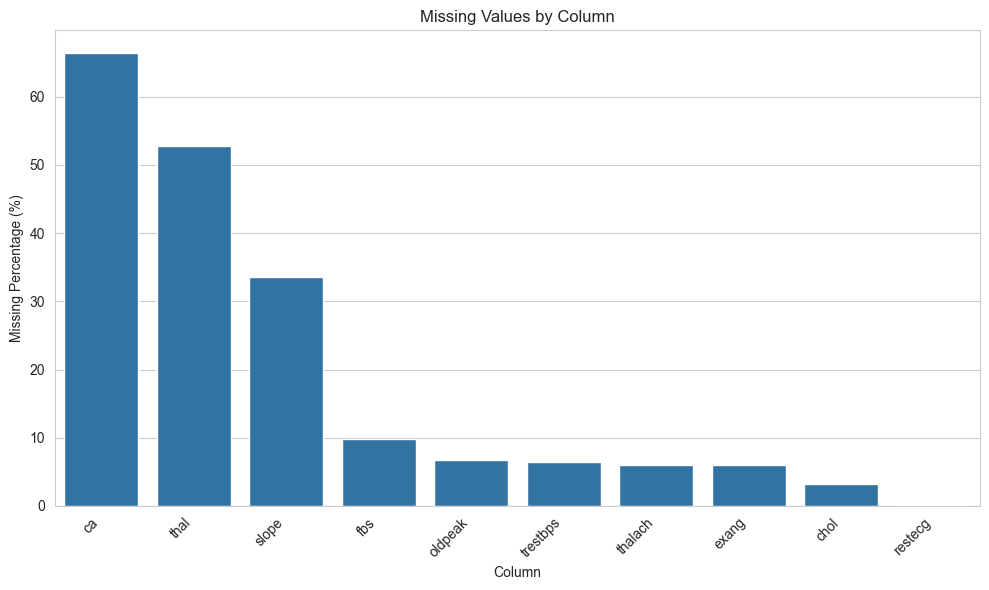

In [5]:
# Check for missing values
missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing Count': missing,
    'Missing Percentage': missing_pct
})
missing_df = missing_df[missing_df['Missing Count'] > 0].sort_values('Missing Count', ascending=False)

if len(missing_df) > 0:
    print("Missing Values:")
    print(missing_df)
    
    # Visualize missing values
    plt.figure(figsize=(10, 6))
    sns.barplot(data=missing_df.reset_index(), x='index', y='Missing Percentage')
    plt.title('Missing Values by Column')
    plt.xlabel('Column')
    plt.ylabel('Missing Percentage (%)')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
else:
    print("No missing values found!")


## 5. Target Variable Distribution


Target Variable Distribution:
No Disease (0): 411 (44.67%)
Disease Present (1): 509 (55.33%)


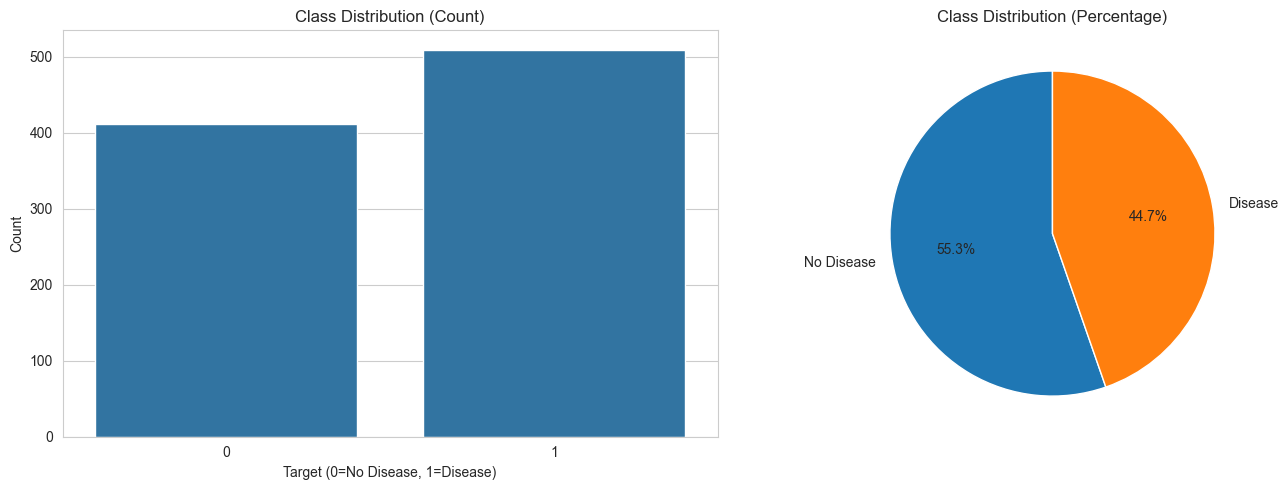

In [6]:
# Class distribution
target_counts = df['target'].value_counts()
target_pct = df['target'].value_counts(normalize=True) * 100

print("Target Variable Distribution:")
print("=" * 60)
print(f"No Disease (0): {target_counts[0]} ({target_pct[0]:.2f}%)")
print(f"Disease Present (1): {target_counts[1]} ({target_pct[1]:.2f}%)")

# Visualize class distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Bar plot
sns.countplot(data=df, x='target', ax=axes[0])
axes[0].set_title('Class Distribution (Count)')
axes[0].set_xlabel('Target (0=No Disease, 1=Disease)')
axes[0].set_ylabel('Count')

# Pie chart
axes[1].pie(target_counts, labels=['No Disease', 'Disease'], autopct='%1.1f%%', startangle=90)
axes[1].set_title('Class Distribution (Percentage)')

plt.tight_layout()
plt.show()


## 6. Feature Distributions (Histograms)


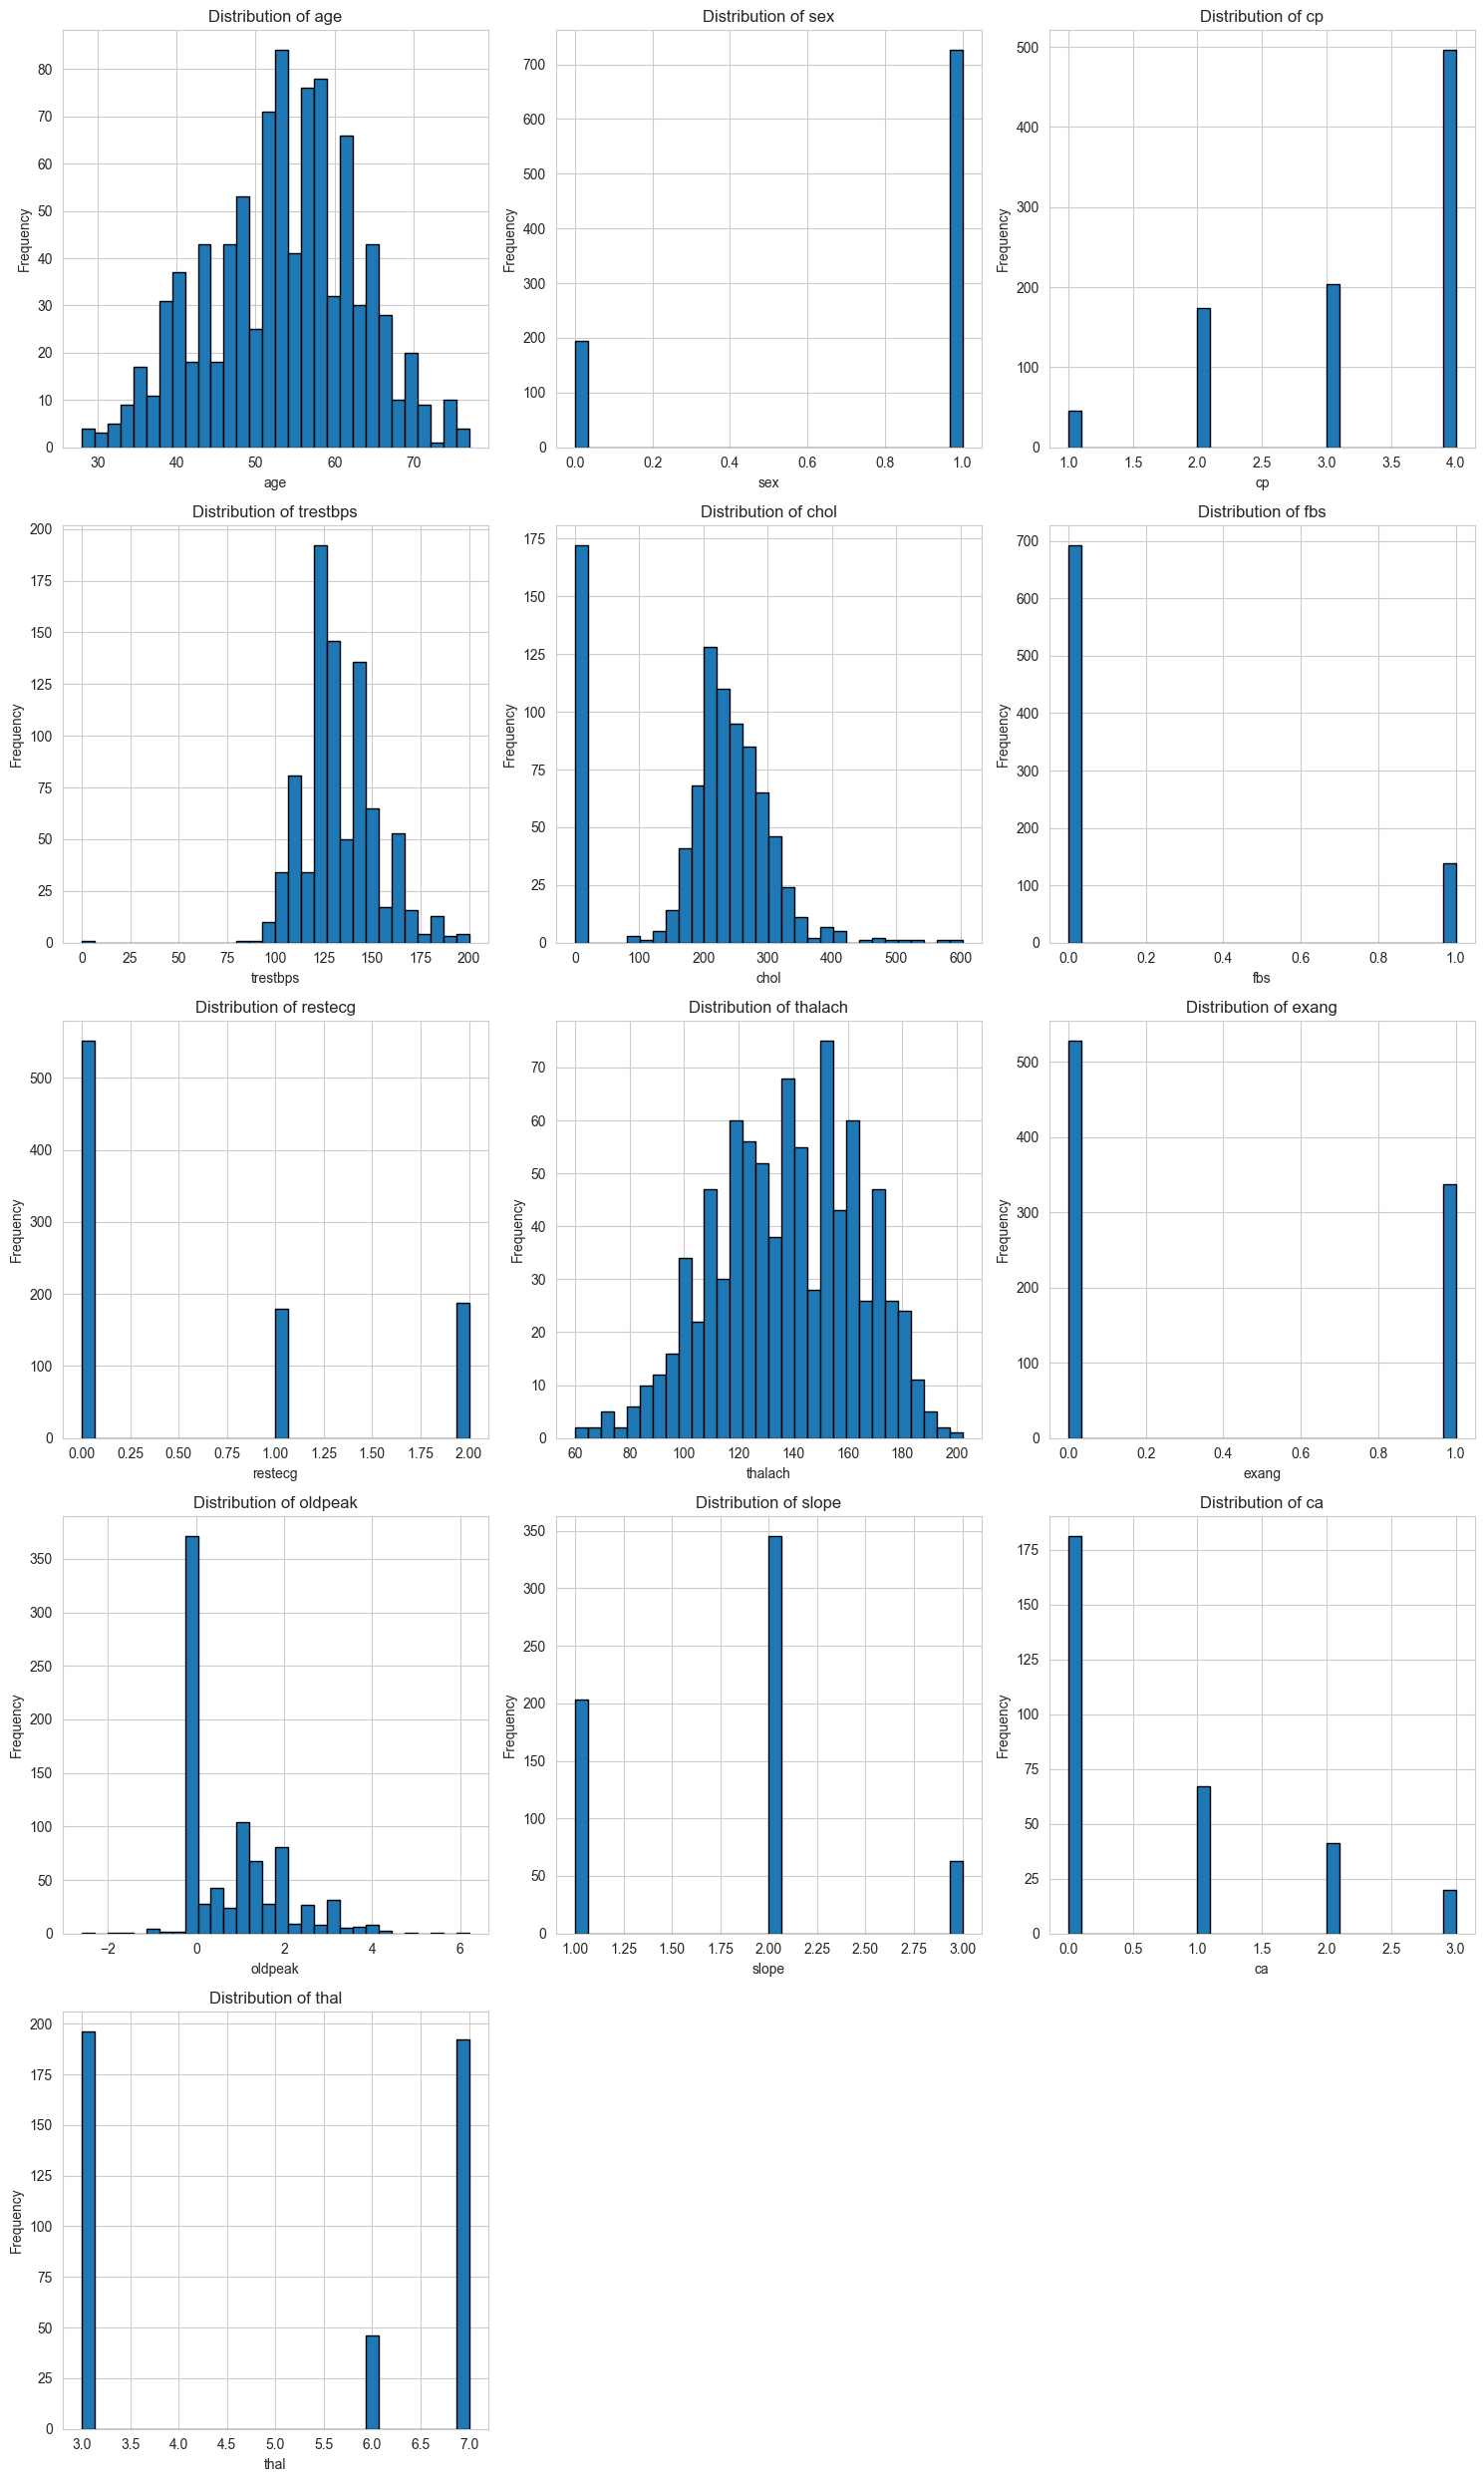

In [7]:
# Select numeric features (excluding target)
numeric_features = df.select_dtypes(include=[np.number]).columns.drop('target')

# Create histograms for all numeric features
n_features = len(numeric_features)
n_cols = 3
n_rows = (n_features + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten() if n_rows > 1 else [axes] if n_cols == 1 else axes

for idx, feature in enumerate(numeric_features):
    ax = axes[idx]
    df[feature].hist(bins=30, ax=ax, edgecolor='black')
    ax.set_title(f'Distribution of {feature}')
    ax.set_xlabel(feature)
    ax.set_ylabel('Frequency')

# Hide extra subplots
for idx in range(n_features, len(axes)):
    axes[idx].set_visible(False)

plt.tight_layout()
plt.show()


## 7. Correlation Analysis


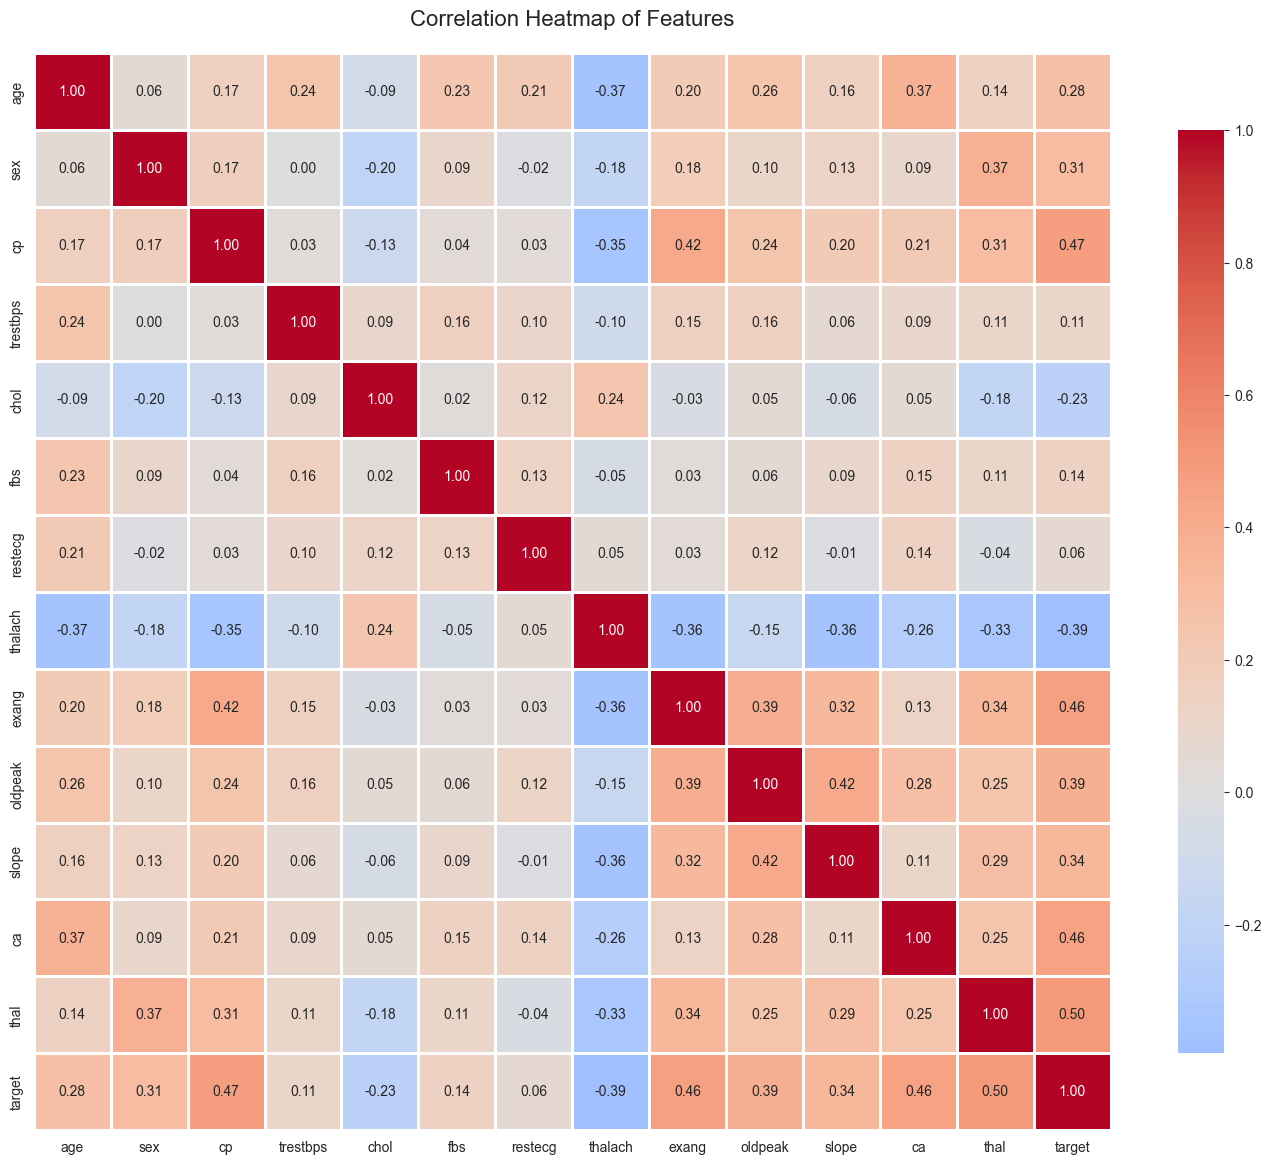

In [8]:
# Compute correlation matrix
correlation_matrix = df.corr()

# Plot correlation heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt='.2f',
    cmap='coolwarm',
    center=0,
    square=True,
    linewidths=1,
    cbar_kws={"shrink": 0.8}
)
plt.title('Correlation Heatmap of Features', fontsize=16, pad=20)
plt.tight_layout()
plt.show()


Top Features Correlated with Target:
thal        0.498521
cp          0.471712
exang       0.463619
ca          0.455599
oldpeak     0.385528
slope       0.337086
sex         0.307284
age         0.282700
fbs         0.142565
trestbps    0.106233
restecg     0.063867
chol       -0.230583
thalach    -0.394503
Name: target, dtype: float64


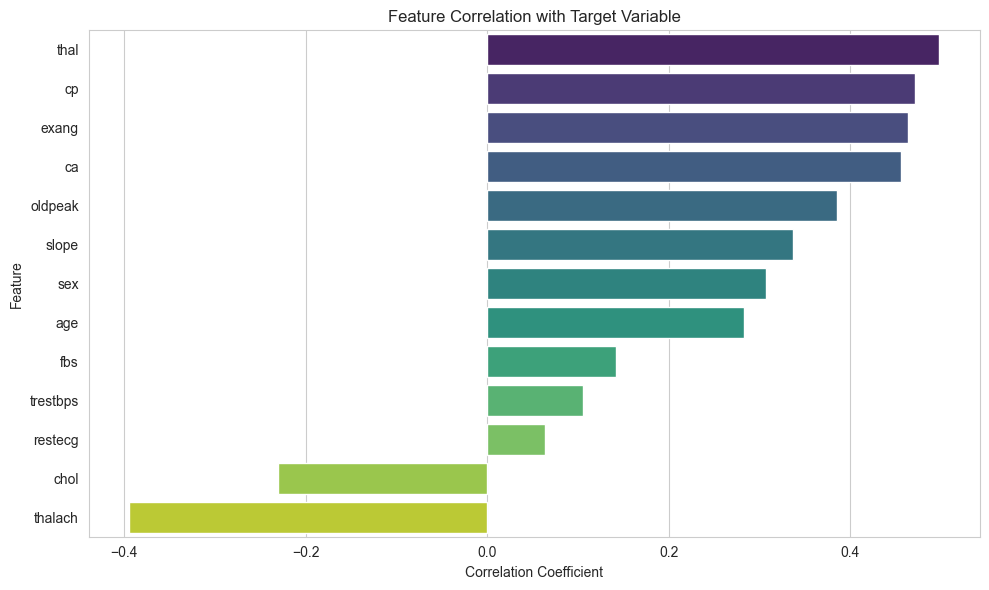

In [9]:
# Top correlations with target
target_corr = correlation_matrix['target'].drop('target').sort_values(ascending=False)

print("Top Features Correlated with Target:")
print("=" * 60)
print(target_corr)

# Visualize
plt.figure(figsize=(10, 6))
sns.barplot(x=target_corr.values, y=target_corr.index, palette='viridis')
plt.title('Feature Correlation with Target Variable')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


## 8. Feature Analysis by Target


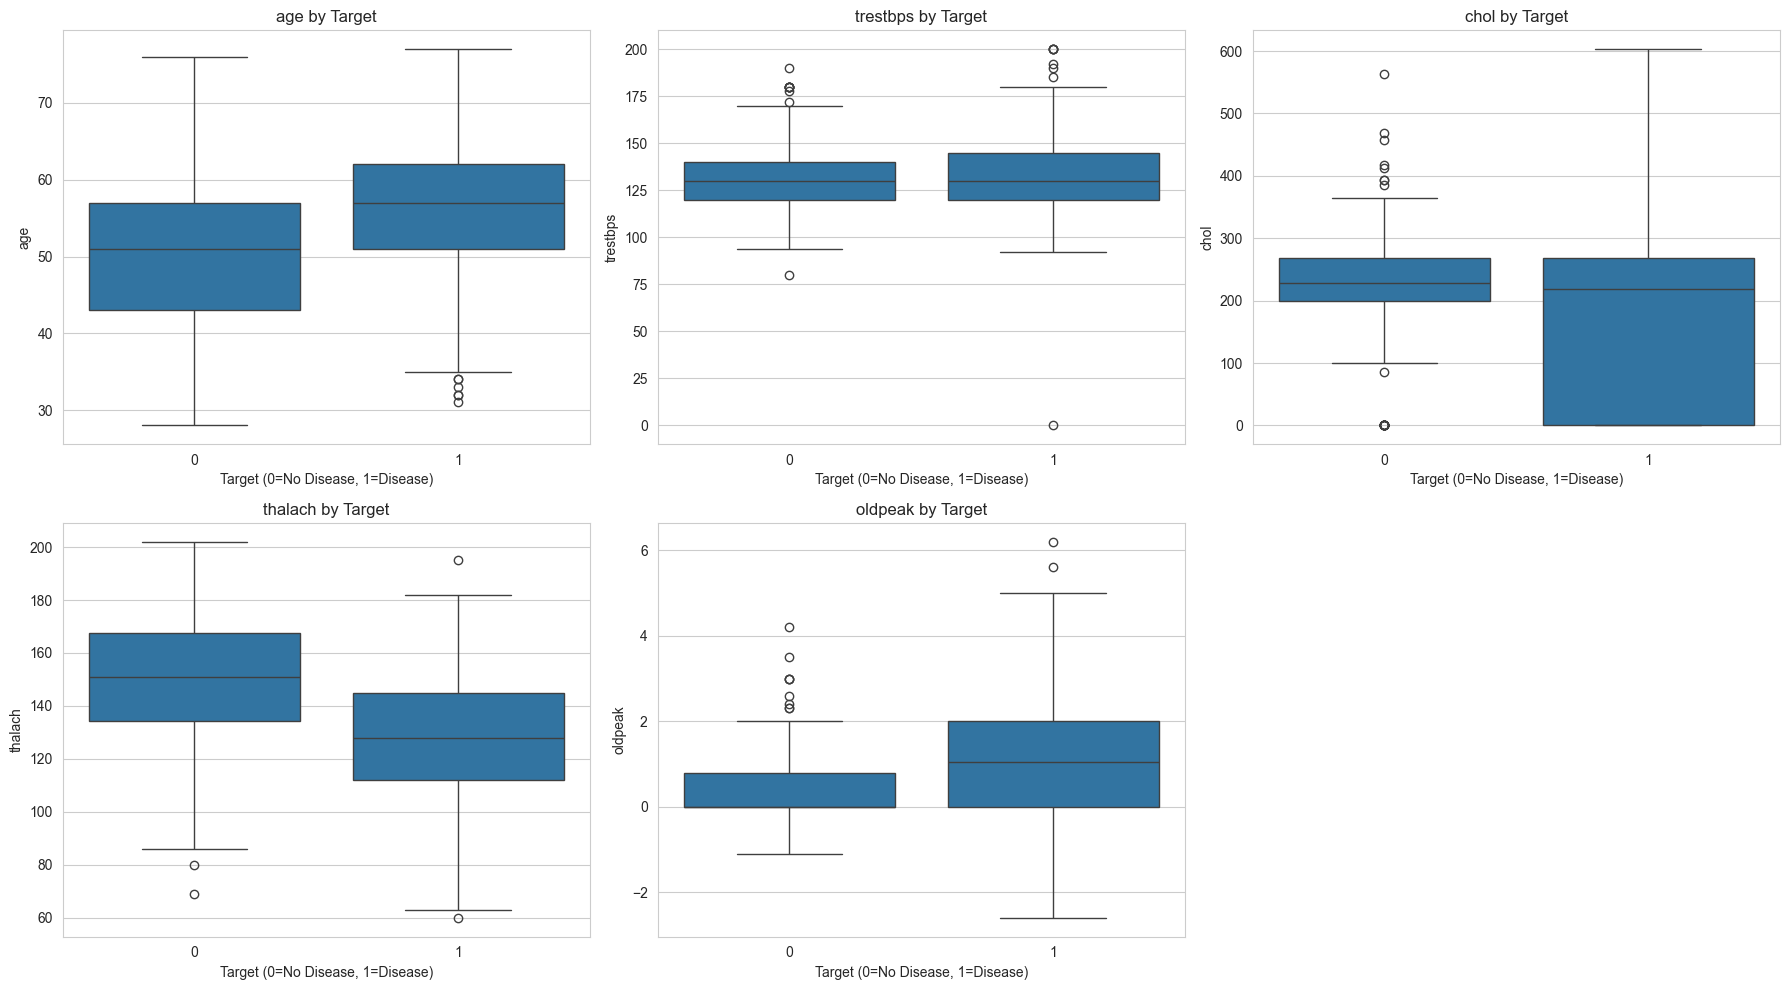

In [10]:
# Box plots for key features by target
key_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for idx, feature in enumerate(key_features):
    if feature in df.columns:
        sns.boxplot(data=df, x='target', y=feature, ax=axes[idx])
        axes[idx].set_title(f'{feature} by Target')
        axes[idx].set_xlabel('Target (0=No Disease, 1=Disease)')

# Hide last subplot if odd number
if len(key_features) < len(axes):
    axes[-1].set_visible(False)

plt.tight_layout()
plt.show()


## 9. Summary Statistics by Target


In [11]:
# Summary by target class
print("Summary Statistics by Target Class:")
print("=" * 60)

for target_val in [0, 1]:
    label = "No Disease" if target_val == 0 else "Disease Present"
    print(f"\n{label} (Target = {target_val}):")
    print(df[df['target'] == target_val][numeric_features].describe())


Summary Statistics by Target Class:

No Disease (Target = 0):
              age         sex          cp    trestbps        chol         fbs  \
count  411.000000  411.000000  411.000000  391.000000  392.000000  397.000000   
mean    50.547445    0.649635    2.761557  129.913043  227.905612    0.110831   
std      9.433700    0.477666    0.903425   16.869867   75.832760    0.314319   
min     28.000000    0.000000    1.000000   80.000000    0.000000    0.000000   
25%     43.000000    0.000000    2.000000  120.000000  199.000000    0.000000   
50%     51.000000    1.000000    3.000000  130.000000  228.000000    0.000000   
75%     57.000000    1.000000    4.000000  140.000000  269.000000    0.000000   
max     76.000000    1.000000    4.000000  190.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  411.000000  391.000000  391.000000  390.000000  218.000000  165.000000   
mean     0.547445  148.800512    0.140665    0

## 10. EDA Summary


In [12]:
print("EDA Summary:")
print("=" * 60)
print(f"Total samples: {len(df)}")
print(f"Total features: {len(df.columns) - 1}")
print(f"Missing values: {df.isnull().sum().sum()}")
print(f"\nClass distribution:")
print(f"  - No Disease: {target_counts[0]} ({target_pct[0]:.2f}%)")
print(f"  - Disease Present: {target_counts[1]} ({target_pct[1]:.2f}%)")
print(f"\nMost correlated features with target:")
for feature, corr in target_corr.head(5).items():
    print(f"  - {feature}: {corr:.3f}")


EDA Summary:
Total samples: 920
Total features: 13
Missing values: 1759

Class distribution:
  - No Disease: 411 (44.67%)
  - Disease Present: 509 (55.33%)

Most correlated features with target:
  - thal: 0.499
  - cp: 0.472
  - exang: 0.464
  - ca: 0.456
  - oldpeak: 0.386
